# Table Creation Scripts

In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.fftpack
import matplotlib.pyplot as plt
import sqlite3 as lite
import sys

In [35]:
%%capture
%load_ext sql

address = '127.0.0.1'
user = 'myadmin'
database = 'csciApp.db'

%sql sqlite:///$database

u'Connected: None@csciApp.db'

In [47]:
%%time
%%sql
--Development Accelerometer Data Table
DROP TABLE IF EXISTS MotionData_dev;
CREATE TABLE MotionData_dev (id INTEGER PRIMARY KEY AUTOINCREMENT, 
                             xAxis REAL, 
                             yAxis REAL, 
                             zAxis REAL,
                             timeStep REAL);

Done.
Done.
CPU times: user 3.11 ms, sys: 1.89 ms, total: 5 ms
Wall time: 5.58 ms


[]

# Analyze accelerometer data for frequency

In [48]:
def plot_fft(df, axis):
    ### Set Variables
    fs = 1000.0/df["timeStep"].mean()
    x = np.array(df[axis])
    NFFT=1024  #NFFT=1024;
    L = len(x) #L=length(x);

    ### Calculate Power Spectral Density
    X = scipy.fftpack.fft(x,NFFT); #X=fft(x,NFFT);
    Px = X.conj(X)/(NFFT*L) #Px=X.*conj(X)/(NFFT*L); %Power of each freq components
    fVals = fs*(np.array(range(0,NFFT/2))/2)/NFFT#fVals=fs*(0:NFFT/2-1)/NFFT;

    ### Plot the Result
    fig, ax = plt.subplots() #figure
    ax.plot(fVals,Px[0:NFFT/2])
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('PSD')
    plt.title('One Sided Power Spectral Density')
    plt.show()

In [49]:
results = %sql select * from MotionData_dev
df = results.DataFrame()
df.head()

Done.


,id,xAxis,yAxis,zAxis,timeStep
0,1,0.021271,-0.001541,-0.999741,49.682
1,2,0.022491,-0.003723,-0.999985,49.774
2,3,0.021729,-0.000809,-0.997543,49.652
3,4,0.020767,-0.000809,-0.999023,49.775
4,5,0.022736,-0.004456,-1.000229,49.652


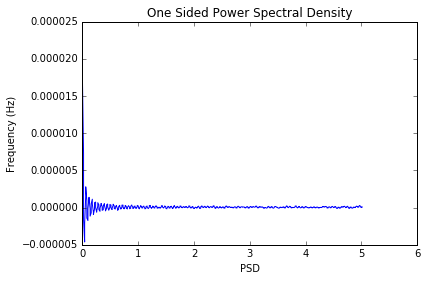

In [50]:
plot_fft(df, "xAxis")

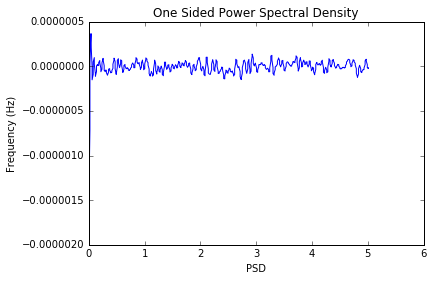

In [51]:
plot_fft(df, "yAxis")

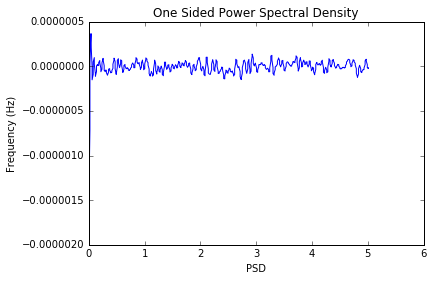

In [52]:
plot_fft(df, "yAxis")

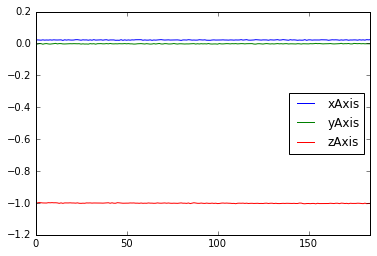

In [53]:
df[["xAxis","yAxis","zAxis"]].plot()